In [121]:
library(Ecdat)
library(dplyr)
library(ISLR)
library(stargazer)
library("ROCR")

library(PerformanceAnalytics)
library(xts)
library(lubridate)

In [122]:
data(Wages)

In [123]:
summary(Wages)

      exp             wks        bluecol         ind         south     
 Min.   : 1.00   Min.   : 5.00   no :2036   Min.   :0.0000   no :2956  
 1st Qu.:11.00   1st Qu.:46.00   yes:2129   1st Qu.:0.0000   yes:1209  
 Median :18.00   Median :48.00              Median :0.0000             
 Mean   :19.85   Mean   :46.81              Mean   :0.3954             
 3rd Qu.:29.00   3rd Qu.:50.00              3rd Qu.:1.0000             
 Max.   :51.00   Max.   :52.00              Max.   :1.0000             
  smsa      married        sex       union            ed        black     
 no :1442   no : 773   female: 469   no :2649   Min.   : 4.00   no :3864  
 yes:2723   yes:3392   male  :3696   yes:1516   1st Qu.:12.00   yes: 301  
                                                Median :12.00             
                                                Mean   :12.85             
                                                3rd Qu.:16.00             
                                              

In [124]:
WagesTemp <- Wages %>%
    mutate(ifsouth = ifelse(south == 'yes', 1, 0))


In [125]:
WagesTemp

exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage,ifsouth
3,32,no,0,yes,no,yes,male,no,9,no,5.56068,1
4,43,no,0,yes,no,yes,male,no,9,no,5.72031,1
5,40,no,0,yes,no,yes,male,no,9,no,5.99645,1
6,39,no,0,yes,no,yes,male,no,9,no,5.99645,1
7,42,no,1,yes,no,yes,male,no,9,no,6.06146,1
8,35,no,1,yes,no,yes,male,no,9,no,6.17379,1
9,32,no,1,yes,no,yes,male,no,9,no,6.24417,1
30,34,yes,0,no,no,yes,male,no,11,no,6.16331,0
31,27,yes,0,no,no,yes,male,no,11,no,6.21461,0
32,33,yes,1,no,no,yes,male,yes,11,no,6.26340,0


In [126]:
model1 = lm(lwage~ifsouth, data=WagesTemp)

In [127]:
summary(model1)


Call:
lm(formula = lwage ~ ifsouth, data = WagesTemp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94100 -0.28546  0.01565  0.27348  1.97102 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.72959    0.00835  805.92   <2e-16 ***
ifsouth     -0.18342    0.01550  -11.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.454 on 4163 degrees of freedom
Multiple R-squared:  0.03255,	Adjusted R-squared:  0.03232 
F-statistic: 140.1 on 1 and 4163 DF,  p-value: < 2.2e-16


In [128]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [129]:
model2 = lm(Personal~Room.Board, data=College)

In [130]:
summary(model2)


Call:
lm(formula = Personal ~ Room.Board, data = College)

Residuals:
    Min      1Q  Median      3Q     Max 
-1153.1  -444.6   -92.3   316.0  5505.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1877.14827   97.64374  19.224  < 2e-16 ***
Room.Board    -0.12312    0.02173  -5.666 2.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 663.9 on 775 degrees of freedom
Multiple R-squared:  0.03977,	Adjusted R-squared:  0.03853 
F-statistic:  32.1 on 1 and 775 DF,  p-value: 2.065e-08


In [131]:
model3 = lm(log(Personal)~log(Room.Board), data=College)
model4 =lm(log(Personal)~Room.Board, data=College)
model5 = lm(Personal~log(Room.Board), data=College)

In [132]:
stargazer(model2, model3, model4, model5, align = TRUE, type = "text", out = "factorModelFull.html")


                                            Dependent variable:              
                               ----------------------------------------------
                                 Personal      log(Personal)       Personal  
                                   (1)         (2)       (3)         (4)     
-----------------------------------------------------------------------------
Room.Board                      -0.123***             -0.0001***             
                                 (0.022)              (0.00002)              
                                                                             
log(Room.Board)                             -0.406***            -536.363*** 
                                             (0.067)               (93.933)  
                                                                             
Constant                       1,877.148*** 10.472***  7.485***  5,818.184***
                                 (97.644)    (0.561)   (0.070) 

In [133]:
summary(model3)
summary(model4)
summary(model5)


Call:
lm(formula = log(Personal) ~ log(Room.Board), data = College)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60098 -0.31047  0.03916  0.30663  1.78574 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10.47164    0.56140  18.653  < 2e-16 ***
log(Room.Board) -0.40568    0.06722  -6.035 2.46e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4749 on 775 degrees of freedom
Multiple R-squared:  0.04489,	Adjusted R-squared:  0.04366 
F-statistic: 36.42 on 1 and 775 DF,  p-value: 2.46e-09



Call:
lm(formula = log(Personal) ~ Room.Board, data = College)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61024 -0.31235  0.03383  0.31037  1.77383 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.485e+00  6.992e-02 107.057  < 2e-16 ***
Room.Board  -9.187e-05  1.556e-05  -5.904  5.3e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4754 on 775 degrees of freedom
Multiple R-squared:  0.04304,	Adjusted R-squared:  0.04181 
F-statistic: 34.86 on 1 and 775 DF,  p-value: 5.303e-09



Call:
lm(formula = Personal ~ log(Room.Board), data = College)

Residuals:
    Min      1Q  Median      3Q     Max 
-1165.3  -442.5   -98.8   296.5  5520.4 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5818.18     784.51   7.416 3.16e-13 ***
log(Room.Board)  -536.36      93.93  -5.710 1.61e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 663.7 on 775 degrees of freedom
Multiple R-squared:  0.04037,	Adjusted R-squared:  0.03913 
F-statistic: 32.61 on 1 and 775 DF,  p-value: 1.609e-08


In [134]:
data <- read.csv("binary.csv")
head(data)

admit,gre,gpa
0,380,3.61
1,660,3.67
1,800,4.00
1,640,3.19
0,520,2.93
1,760,3.00


In [135]:
data$admit <- as.factor(data$admit)

In [136]:
model6 <- glm(admit ~ gre+gpa , data = data, family = "binomial")
summary(model6)


Call:
glm(formula = admit ~ gre + gpa, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


In [137]:
# make predictions using Model 4

data <-  data %>% 
  mutate(pred_prob_model6 = predict(model6, newdata = ., type = "response")) %>% 
  mutate(pred_outcome_model6 = ifelse(pred_prob_model6 >= 0.5,1,0))
# we are using 0.5 as cutoff for predicting Y=1. 
data

admit,gre,gpa,pred_prob_model6,pred_outcome_model6
0,380,3.61,0.2310310,0
1,660,3.67,0.4003934,0
1,800,4.00,0.5552525,1
1,640,3.19,0.3057871,0
0,520,2.93,0.2076762,0
1,760,3.00,0.3451566,0
1,560,2.98,0.2326106,0
0,400,3.08,0.1752786,0
1,540,3.39,0.2813004,0
0,700,3.92,0.4731441,0


[1] "prediction"
attr(,"package")
[1] "ROCR"

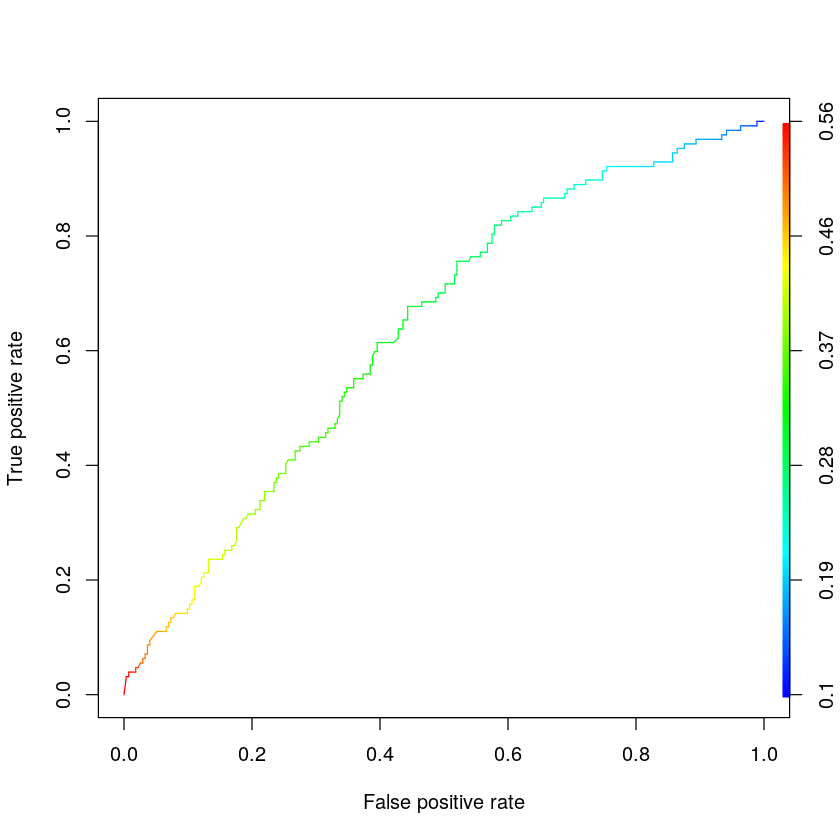

In [138]:
#ROC Curve
pred <- prediction(data$pred_prob_model6,data$admit) # create a prediction object in R
class(pred)

perf <- performance(pred, "tpr", "fpr") # tpr and fpr are true and false positive rates
plot(perf, colorize=T)

In [139]:
# calculate Area Under the Curve for this Logit Model
auc.perf <-  performance(pred, measure = "auc")
auc.perf@y.values

[[1]]
[1] 0.6354158

In [140]:
fund <- read.csv("Berkshire.csv")

In [141]:
head(fund)

Date,BrkRet,MKT,RF
11/30/1976,0.1544,0.0076,0.0040
12/31/1976,0.1465,0.0605,0.0040
1/31/1977,0.0000,-0.0369,0.0036
2/28/1977,0.0000,-0.0160,0.0035
3/31/1977,0.0778,-0.0099,0.0038
4/30/1977,-0.0103,0.0053,0.0038


In [142]:
fund$Date <- mdy(fund$Date)

In [143]:
fund2<- fund[order(fund$Date),]
head(fund2)

Date,BrkRet,MKT,RF
1976-11-30,0.1544,0.0076,0.0040
1976-12-31,0.1465,0.0605,0.0040
1977-01-31,0.0000,-0.0369,0.0036
1977-02-28,0.0000,-0.0160,0.0035
1977-03-31,0.0778,-0.0099,0.0038
1977-04-30,-0.0103,0.0053,0.0038


In [144]:
All.dat <- xts(fund2[,-1],order.by = fund2[,1],)
head(All.dat)

            BrkRet     MKT     RF
1976-11-30  0.1544  0.0076 0.0040
1976-12-31  0.1465  0.0605 0.0040
1977-01-31  0.0000 -0.0369 0.0036
1977-02-28  0.0000 -0.0160 0.0035
1977-03-31  0.0778 -0.0099 0.0038
1977-04-30 -0.0103  0.0053 0.0038

In [145]:
mean((All.dat$BrkRet))

[1] 0.0189872

In [146]:
table.Stats(All.dat)
# to calculate the performance
# 102  100
# 190  X
# X = 186.27 ---> 86% outperformed 

,BrkRet,MKT,RF
Observations,500.0000,500.0000,500.0000
NAs,0.0000,0.0000,0.0000
Minimum,-0.2174,-0.2264,0.0000
Quartile 1,-0.0162,-0.0156,0.0010
Median,0.0122,0.0136,0.0039
Arithmetic Mean,0.0190,0.0102,0.0037
Geometric Mean,0.0168,0.0092,0.0037
Quartile 3,0.0476,0.0389,0.0053
Maximum,0.3548,0.1289,0.0135
SE Mean,0.0030,0.0019,0.0001


,BrkRet,MKT,RF
Cumulative Return,4143.99,96.22392,5.359804


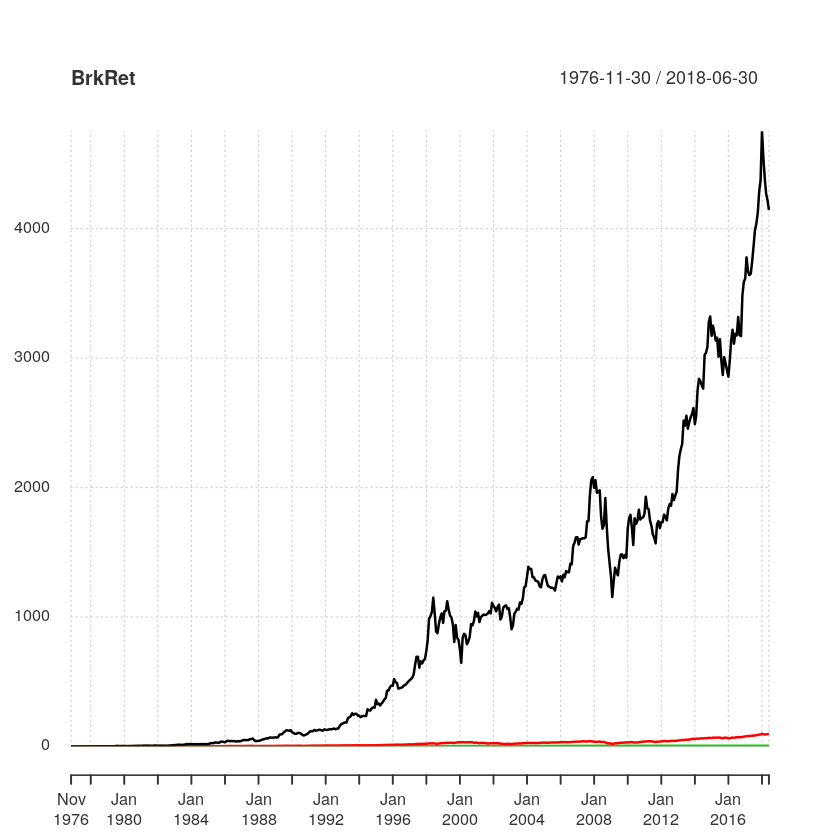

In [147]:
Return.cumulative(All.dat,geometric = TRUE)
chart.CumReturns(All.dat,wealth.index = FALSE, geometric = TRUE)

# 1 dollar investment increased in this period of time to $4143
# 10000 investment will be around 10,000 X 4,143 = 41,430,000

In [148]:
SharpeRatio(All.dat$BrkRet,All.dat$RF)
TreynorRatio(All.dat$BrkRet,All.dat$MKT,All.dat$RF)

,BrkRet
"StdDev Sharpe (Rf=0.4%, p=95%):",0.2262115
"VaR Sharpe (Rf=0.4%, p=95%):",0.2060944
"ES Sharpe (Rf=0.4%, p=95%):",0.1728184


[1] 0.2448581

In [149]:
SharpeRatio(All.dat$MKT,All.dat$RF) #professor has done this calculation in her talk.


,MKT
"StdDev Sharpe (Rf=0.4%, p=95%):",0.14794528
"VaR Sharpe (Rf=0.4%, p=95%):",0.09486128
"ES Sharpe (Rf=0.4%, p=95%):",0.05677763


In [150]:
All.dat<-transform(All.dat,MktExcess=MKT-RF,FundExcess=BrkRet-RF)  #check next cell too
Alpha=lm(FundExcess~MktExcess,data=All.dat)
summary(Alpha)



Call:
lm(formula = FundExcess ~ MktExcess, data = All.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17263 -0.03475 -0.00688  0.02608  0.33062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.010829   0.002724   3.976 8.05e-05 ***
MktExcess   0.689755   0.061777  11.165  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06025 on 498 degrees of freedom
Multiple R-squared:  0.2002,	Adjusted R-squared:  0.1986 
F-statistic: 124.7 on 1 and 498 DF,  p-value: < 2.2e-16


In [155]:
test=lm(BrkRet~MKT,data=All.dat) #calculate the beta
summary(test)



Call:
lm(formula = BrkRet ~ MKT, data = All.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17261 -0.03500 -0.00694  0.02680  0.33180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.011891   0.002771   4.291 2.13e-05 ***
MKT         0.698521   0.061983  11.270  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06034 on 498 degrees of freedom
Multiple R-squared:  0.2032,	Adjusted R-squared:  0.2016 
F-statistic:   127 on 1 and 498 DF,  p-value: < 2.2e-16


In [151]:
data <- read.csv("Factor_HiTec.csv")


In [152]:
head(data)

Month,RF,HiTec,Mkt_rf,SMB,HML,Mom,BAB,QMJ
198001,0.0080,0.0737,0.0551,0.0168,0.0181,0.0748,0.0263,-0.0274
198002,0.0089,-0.0356,-0.0122,-0.0181,0.0067,0.0790,-0.0153,-0.0200
198003,0.0121,-0.1267,-0.1290,-0.0662,-0.0108,-0.0957,-0.0471,0.0470
198004,0.0126,0.0072,0.0397,0.0094,0.0114,-0.0039,0.0209,-0.0337
198005,0.0081,0.0482,0.0526,0.0216,0.0041,-0.0111,0.0365,0.0069
198006,0.0061,0.0303,0.0306,0.0167,-0.0089,0.0155,0.0369,-0.0111


In [153]:
factor <- lm(HiTec ~ Mkt_rf+SMB+HML+Mom+BAB+QMJ, data = data)
stargazer(factor, align = TRUE, type = "text", out = "factorModelFull.html")



                        Dependent variable:    
                    ---------------------------
                               HiTec           
-----------------------------------------------
Mkt_rf                       1.113***          
                              (0.036)          
                                               
SMB                          0.219***          
                              (0.048)          
                                               
HML                          -0.534***         
                              (0.051)          
                                               
Mom                          -0.088***         
                              (0.031)          
                                               
BAB                          -0.290***         
                              (0.040)          
                                               
QMJ                           -0.036           
                              (0.074)  

In [154]:
cor(data$HML, data$Mom, method = c("pearson", "kendall", "spearman"))

[1] -0.2114656